In [12]:
from cartopy import config
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import scipy.stats
from scipy import stats
from scipy.stats import ttest_ind 
import xarray as xr

In [2]:
# open dataset consisting of all differences between 36 ensembles and controls

ds = xr.open_dataset('/g/data/e14/cp3790/Charuni/ModelExperiment/ensemble_diff.nc')
ds

<xarray.Dataset>
Dimensions:    (latitude: 50, longitude: 110, time: 36)
Coordinates:
  * longitude  (longitude) float32 135.25 135.75 136.25 ... 188.75 189.25 189.75
  * latitude   (latitude) float32 -52.75 -52.25 -51.75 ... -29.25 -28.75 -28.25
    height     float64 ...
Dimensions without coordinates: time
Data variables:
    ts         (time, latitude, longitude) float32 ...

In [3]:
ts = ds.ts

In [6]:
# One sample T-test to determine if the mean of the differences is significantly different to 0

r = stats.ttest_1samp(ts, 0, axis=0, nan_policy='omit')

In [7]:
# Convert the p-values into a dataarray:
da = xr.DataArray(r[1], dims=('latitude', 'longitude'), coords={
    'latitude': ts['latitude'],
    'longitude': ts['longitude']
})

/g/data3/hh5/public/apps/miniconda3/envs/analysis27-18.10/lib/python2.7/site-packages/seaborn/apionly.py:9: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)
/g/data3/hh5/public/apps/miniconda3/envs/analysis27-18.10/lib/python2.7/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/110m/physical/ne_110m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


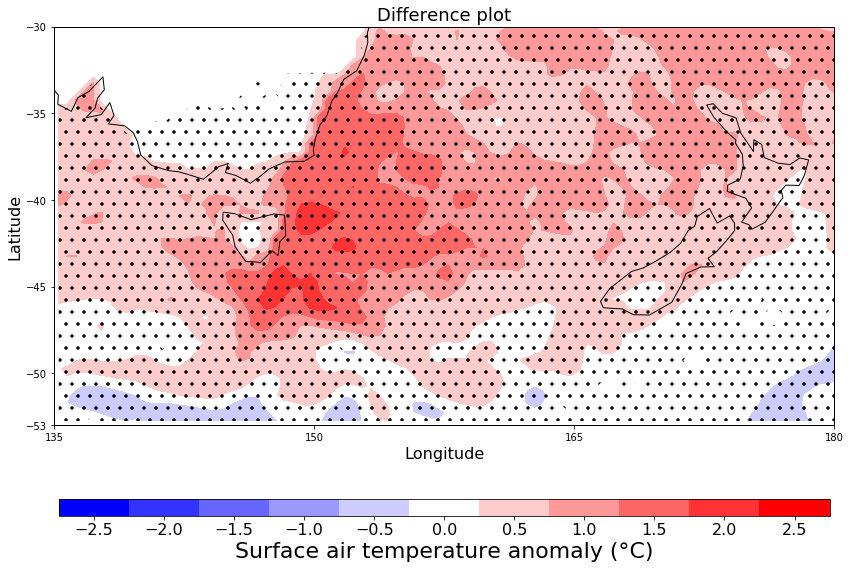

In [13]:
fig, ax = plt.subplots(111, figsize=(16,9))    
ax = plt.subplot(111, projection=ccrs.PlateCarree())
ax.set_extent([135, 180, -53, -30],crs=ccrs.PlateCarree())    

ax.set_xticks([135, 150, 165, 180], crs=ccrs.PlateCarree())
ax.set_yticks([-53, -50, -45, -40, -35, -30], crs=ccrs.PlateCarree())

im=ts.mean(dim='time').plot.contourf(
            levels=np.arange(-2.75, 3.0, 0.5),
            add_colorbar=False,
            cmap=plt.cm.get_cmap('bwr', 11), 
       )

cb = plt.colorbar(im, orientation="horizontal",ticks=np.arange(-2.5,3.0,0.5),fraction=0.035,aspect=45) #,format='%.2f')
cb.set_label(label=u'Surface air temperature anomaly (\u00B0C)', size=22, weight='normal')
cb.ax.tick_params(labelsize=16)


da.plot.contourf(levels=[0.00, 0.05], hatches=['.', None], colors='none', add_colorbar=False)
ax.coastlines()


plt.xlabel('Longitude',fontsize=16)
plt.ylabel('Latitude', fontsize=16)
plt.title('Difference plot', fontsize=18)

plt.show()